# Capstone Project (Used Car Price Prediction)

## Part 2

In this notebook, I had performed scaling and model building on a processed dataset, saved from a previous notebook. I had applied nine different regression models to predict used car prices, and detailed instructions for each step are provided throughout the notebook. Finally, you can find the highest-scoring model saved using the pickle library for deployment on the web with the Streamlit library.


The columns in the given Processed dataset are as follows:

- Car_Brand
- Car_Name
- Year
- Selling_Price
- Km_Driven
- Fuel
- Seller_Type
- Transmission
- Owner


### Questions

1) Explore the Data using Excel. Understand the data and prepare a short summary about the dataset in the PPT.
2) Download the CAR DETAILS dataset and perform Data cleaning and Data Pre-Processing if Necessary.
3) Use the various methods such as Handling null values, One-Hot Encoding, Imputation and Scaling of Data Pre-Processing where necessary.
4) Perform Exploratory data analysis (EDA) on the Data and perform Graphical Analysis on the Data. Include the graphs with conclusions from the Graphical Analysis.
5) Prepare the Data for Machine Learning modeling.
6) Apply various Machine Learning techniques such as Regression or classification ,Bagging, Ensemble techniques and find out the best model using various Machine Learning model evaluation metrics.⬅️
7) Save the best model and Load the model.⬅️
8) Take the original data set and make another dataset by randomly picking 20 data points from the CAR DETAILS dataset and apply the saved model on the same Dataset and test the model.⬅️
9) Make a GitHub Account by visiting the GitHub Website. Create a repository named Data Science Capstone Project and upload the model with the dataset, code file.
10) Create a Streamlit Account by visiting the Streamlit Website. Connect your GitHub account with streamlit.
11) Create an app.py file and other dependencies files for Streamlit app to be deployed on Streamlit Cloud. Make a simple website and deploy your ML model on Streamlit, Make the website public.
12) Share the Streamlit website and GitHub repository links in the Project PPT.

### Context

- Importing Libraries
- Uploading Dataset
- Applying Scaling
    1) [Label Encoding](#label)
    2) [Standardization](#scale)
- [Checking Correlation](#corr)
- [Modal Building](#mb)
- [Checking Important Feature](#feature)
- Modal
    1) Basic Regression Algorithms
        * [Linear Regression](#lr)
        * [Ridge Regression](#ri)
        * [Lasso Regression](#la)
        * [KNeighbour Regression](#knr)
    2) Ensemble Techniques 
        
        <i>Bagging Algorithms</i>
        * [Decision Tree Regression](#dt)
        * [Random Forest Regression](#rf)

        <i>Bagging Algorithms</i>
        * [AdaBoost Regression](#ab)
        * [Gradient Boosting Regression](#gb)
        * [XGBoost Regression](xg#)
- [Saving and Loading the modal](#save)
- [Obtaining sample dataset](#sam)
- [Producing prediction through saved modal](#pred)


#### Importing Modules and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

import pickle as pkl

import warnings
warnings.filterwarnings("ignore")

### Uploading the preprocessed dataset

In [2]:
df = pd.read_csv('Car_Details_Cleaned_Dataset.csv')

In [3]:
# Creating a copy of dataset
data = df.copy()

In [4]:
# Checking shape of dataset
data.shape

(3250, 9)

In [5]:
# Seprating the categorical and numerical columns
categorical_col = ['Car_Brand', 'Car_Name', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']
numerical_col = ['Year', 'Selling_Price', 'Km_Driven']

#### Applying Label Encoding
<a id='label'></a>

In [6]:
# Encoding categorical data
label_encoder = {} 
for i in categorical_col:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])
    label_encoder[i] = le
le

LabelEncoder()

In [7]:
# Viewing the dataset after applying label encoding
data.head()

,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,12,5,2007,60000,70000,4,1,1,0
1,12,142,2007,135000,50000,4,1,1,0
2,10,139,2012,600000,100000,1,1,1,0
3,5,108,2017,250000,46000,4,1,1,0
4,9,13,2014,450000,141000,1,1,1,2


### Checking Correlation between features
<a id='corr'></a>

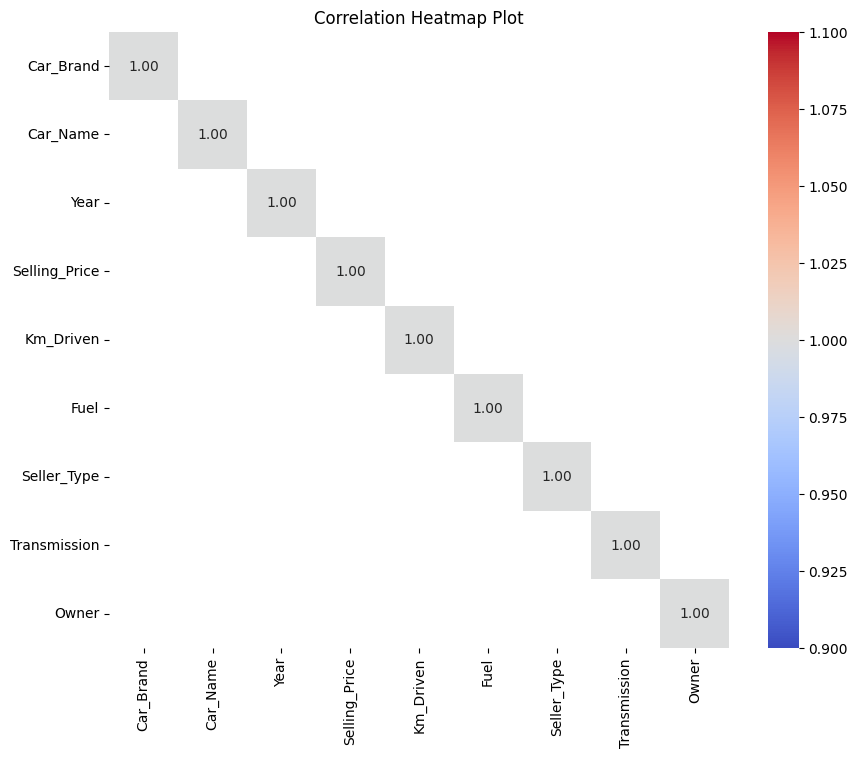

In [8]:
corr = data.corr()
corr = corr[corr>=0.7]
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap Plot")
plt.show()

<b>There is no correlation between features with each other.So, there is no need to further dive in the dataset. Now, lets proceed with the ML model building.

### Modal Building
<a id='mb'></a>

In [9]:
# Separating Dependent and Independent Variables
x = data.drop(["Selling_Price"], axis=1)
y = data["Selling_Price"]

### Features Importance in Dataset
<a id='feature'></a>

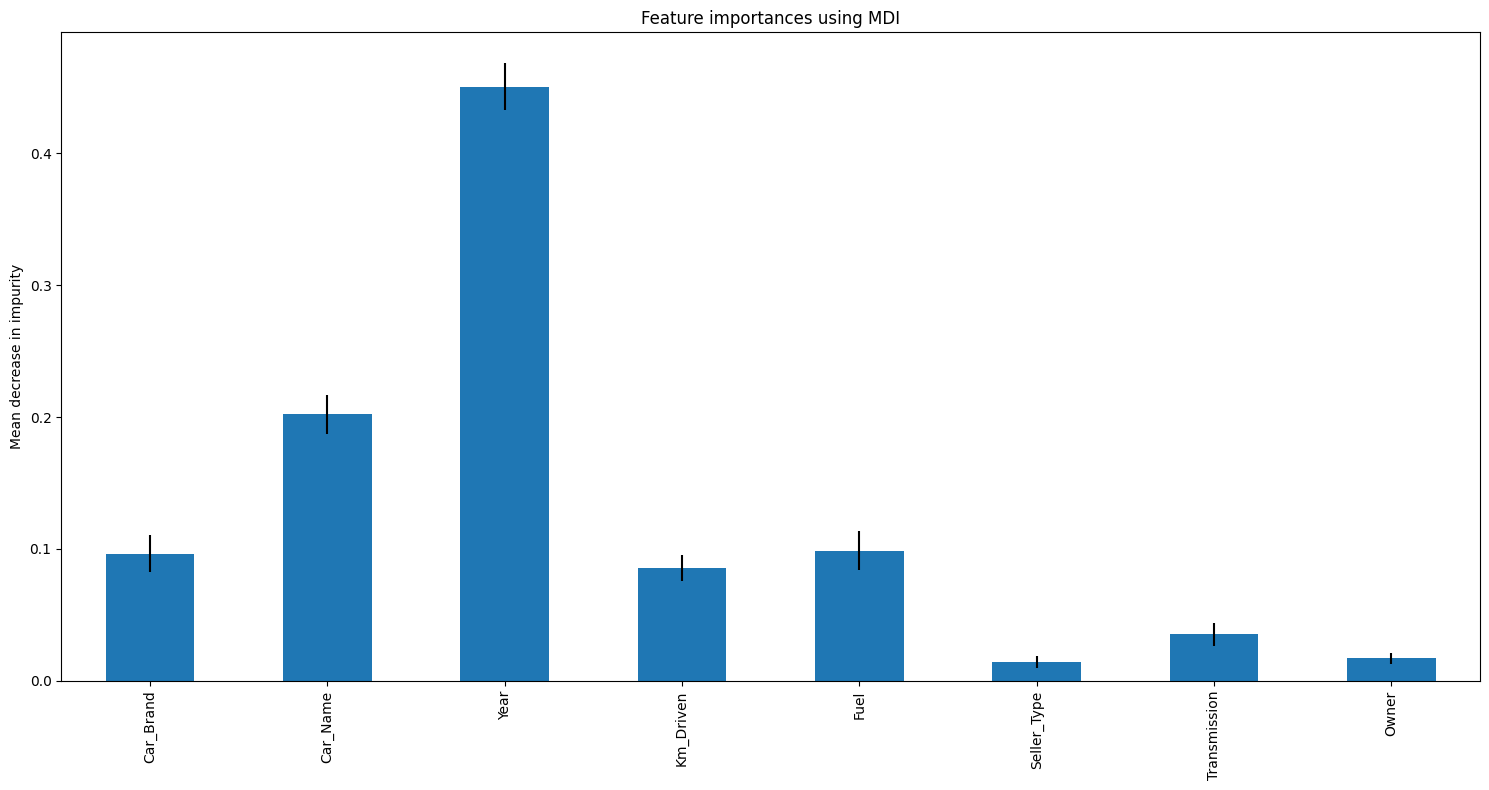

In [10]:
forest = RandomForestRegressor()
forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=x.columns)

fig, ax = plt.subplots(figsize=(15, 8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

<i>This plot demonstrates the importance of different features in predicting the target variable using a Random Forest regression model through MDI(mean decrease in impurity), helping in identify the Year features contribute most to the model's predictions.

In [11]:
# Splitting into Training and Testing Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#### Implementing Standardization
<a id='scale'></a>

In [12]:
# Standardize numerical column
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[-2.39427591, -1.65638215, -1.7656602 , ...,  0.4464156 ,
        -3.87722771,  0.87237108],
       [-0.94964843, -0.7956773 ,  1.74201389, ...,  0.4464156 ,
         0.25791624, -0.71358067],
       [-0.46810594,  1.15115511, -0.26237131, ...,  0.4464156 ,
         0.25791624, -0.71358067],
       ...,
       [-0.94964843, -0.44729676, -2.01620835, ...,  0.4464156 ,
         0.25791624,  2.45832282],
       [-0.46810594, -0.93912811,  0.73982129, ...,  0.4464156 ,
         0.25791624,  0.87237108],
       [-0.46810594, -0.73419838,  1.49146574, ...,  0.4464156 ,
         0.25791624, -0.71358067]])

In [13]:
# Creating variable to store model evaluation data
model_scores = {}

# Creating  Model Evaluation Function 
def evaluate(model, model_name, x_train, y_train, x_test, y_test):
    y_pred = model.predict(x_test)

    # Calculating Model Evaluation
    training_score = model.score(x_train,y_train)
    testing_score = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Model",model_name)
    print("Training Score",training_score)
    print("Testing Score",testing_score)
    print("Mean Squared Error",mse)
    print("Mean Absolute Error",mae)
    print("R2 Score",r2)
    
    # Storing score of each model in model_scores variable    
    model_scores[model_name] = {'Training Score': training_score,'Testing Score': testing_score,'R² Score': r2}

### Basic Regression Algorithm

#### 1.Linear Regression 
<a id='lr'></a>

In [14]:
linear = LinearRegression()
linear.fit(x_train,y_train)
evaluate(linear,"Linear Regression",x_train,y_train,x_test,y_test)


Model Linear Regression
Training Score 0.5124452737735408
Testing Score 0.5382629439096264
Mean Squared Error 29071426521.83147
Mean Absolute Error 131145.68102530134
R2 Score 0.5382629439096264


#### 2.Ridge Regression
<a id='ri'></a>

In [15]:
ridge = Ridge()
ridge.fit(x_train,y_train)
evaluate(ridge,"Ridge Regression",x_train,y_train,x_test,y_test)


Model Ridge Regression
Training Score 0.5124438663512985
Testing Score 0.5381318412255883
Mean Squared Error 29079680877.84547
Mean Absolute Error 131164.27825863552
R2 Score 0.5381318412255883


#### 3.Lasso Regression
<a id='la'></a>

In [16]:
lasso = Lasso()
lasso.fit(x_train,y_train)
evaluate(lasso,"Lasso Regression",x_train,y_train,x_test,y_test)


Model Lasso Regression
Training Score 0.5124452734171158
Testing Score 0.5382609004817511
Mean Squared Error 29071555178.09274
Mean Absolute Error 131145.9063757513
R2 Score 0.5382609004817511


#### 4.KNeighbors Regression
<a id='knr'></a>

In [17]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
evaluate(knn,"KNeighbors Regressor",x_train,y_train,x_test,y_test)


Model KNeighbors Regressor
Training Score 0.47405133886586115
Testing Score 0.2213330357067549
Mean Squared Error 49025650289.15076
Mean Absolute Error 166937.86888068877
R2 Score 0.2213330357067549


#### Ensemble Techniques
a) Bagging Techniques

#### 5. Decision Tree Regression
<a id='dt'></a>

In [18]:
decision = DecisionTreeRegressor()
decision.fit(x_train,y_train)
evaluate(decision,"Decision Tree",x_train,y_train,x_test,y_test)


Model Decision Tree
Training Score 0.9964248452716197
Testing Score 0.5590784843741485
Mean Squared Error 27760859290.666634
Mean Absolute Error 111574.86326363265
R2 Score 0.5590784843741485


#### 6. Random Forest Regression
<a id='rf'></a>

In [19]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
evaluate(RF,"Random Forest",x_train,y_train,x_test,y_test)


Model Random Forest
Training Score 0.9648231940210549
Testing Score 0.7729353574818341
Mean Squared Error 14296216826.445896
Mean Absolute Error 83556.70206747984
R2 Score 0.7729353574818341


b) Boosting Techniques

#### 7. AdaBoost Regression
<a id='ab'></a>

In [20]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
evaluate(ada,"AdaBoost",x_train,y_train,x_test,y_test)


Model AdaBoost
Training Score 0.4360221382408246
Testing Score 0.38467705113054407
Mean Squared Error 38741347828.392296
Mean Absolute Error 167348.96983417572
R2 Score 0.38467705113054407


#### 8. Gradient Boosting Regression
<a id='gb'></a>

In [21]:
gradient = GradientBoostingRegressor()
gradient.fit(x_train,y_train)
evaluate(gradient,"Gradient Boosting",x_train,y_train,x_test,y_test)


Model Gradient Boosting
Training Score 0.7912981311474394
Testing Score 0.763553045658626
Mean Squared Error 14886936555.728172
Mean Absolute Error 89256.52604356421
R2 Score 0.763553045658626


 #### 9. XGBoost Regression
 <a id='xg'></a>

In [22]:
xgb =XGBRegressor()
xgb.fit(x_train,y_train)
evaluate(xgb,"XGBoost",x_train,y_train,x_test,y_test)


Model XGBoost
Training Score 0.9671026468276978
Testing Score 0.8080800771713257
Mean Squared Error 12083469805.83906
Mean Absolute Error 75008.2543614987
R2 Score 0.8080800771713257


#### Retrieving models with their scores

In [23]:
pd.DataFrame(model_scores).T

,Training Score,Testing Score,R² Score
Linear Regression,0.512445,0.538263,0.538263
Ridge Regression,0.512444,0.538132,0.538132
Lasso Regression,0.512445,0.538261,0.538261
KNeighbors Regressor,0.474051,0.221333,0.221333
Decision Tree,0.996425,0.559078,0.559078
Random Forest,0.964823,0.772935,0.772935
AdaBoost,0.436022,0.384677,0.384677
Gradient Boosting,0.791298,0.763553,0.763553
XGBoost,0.967103,0.808080,0.808080


- The XGBoost model achieved the best accuracy at 80%, outperforming Gradient Boosting at 76% and other models, despite showing signs of overfitting. This overfitting is likely due to the imbalanced nature of our dataset. From various plots in my notebook, CapStone_Project (Preprocessing and Graphical Analysis), you can observe that our dataset is imbalanced: approximately 40% of car brands have five or fewer data points, making it difficult for the model to accurately predict selling prices for those brands.
- Despite Gradient Boosting having similar training and testing scores, and fitting the mean model perfectly, XGBoost is preferable due to its superior testing accuracy and robust handling of complex data structures, making it the most reliable choice for this dataset.

In the future, acquiring an additional dataset with the same features could help my machine learning model overcome overfitting, as more data can allow the model to learn broader patterns rather than memorizing the training data. Currently, the dataset is too small, leading to overfitting.

### Saving the Model 
<a id='save'></a>

In [24]:
pkl.dump(xgb,open('app.pkl','wb'))


### Uploading the Model

In [25]:
model = pkl.load(open('app.pkl','rb'))


### Generating Sample Dataset
<a id='sam'></a>
Take the original data set and make another dataset by randomly picking 20 data points from the PROCESSED CAR DETAILS dataset and apply the saved model on the same Dataset and test the model.

In [26]:
sample_data = df.sample(n = 20, random_state = 40).reset_index(drop=True)  # Reordering index - just for better visualization.
sample_data.head()

,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,Hyundai,i20,2015,525000,70378,Petrol,Dealer,Manual,First Owner
1,Hyundai,Santro,2012,300000,50000,Petrol,Individual,Manual,First Owner
2,Honda,City,2011,310000,110000,Petrol,Individual,Manual,First Owner
3,Chevrolet,Spark,2009,70000,60000,Petrol,Individual,Manual,Third Owner
4,Maruti,Swift,2015,415000,28217,Petrol,Trustmark Dealer,Manual,First Owner


### Saving the Sample Dataset

In [27]:
sample_data.to_csv("Sample_Dataset.csv", index=False)

In [28]:
# Applying Scaling
for i in categorical_col:
    sample_data[i] = label_encoder[i].transform(sample_data[i])
sample_data.head()

,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,10,155,2015,525000,70378,4,0,1,0
1,10,117,2012,300000,50000,4,1,1,0
2,9,33,2011,310000,110000,4,1,1,0
3,3,122,2009,70000,60000,4,1,1,4
4,12,127,2015,415000,28217,4,2,1,0


### Generating prediction through Model on Sample Dataset
<a id='pred'></a>

In [29]:
# Splitting Input and Target variables
sample_x = sample_data.drop(["Selling_Price"], axis=1)
sample_y = sample_data["Selling_Price"]

# Generating predicion using the loaded model
sample_pred = model.predict(sample_x).astype(int)

# Comparing the actual and predicted data 
results = pd.DataFrame({'Actual': sample_y, 'Predicted': sample_pred, 'Difference in %': ((sample_y - sample_pred)/sample_y)*100})
print("\nRandom Predictions on 20 Data Points:")
results



Random Predictions on 20 Data Points:


,Actual,Predicted,Difference in %
0,525000,545565,-3.917143
1,300000,257234,14.255333
2,310000,312039,-0.657742
3,70000,92662,-32.374286
4,415000,447666,-7.871325
5,750000,745760,0.565333
6,200000,199942,0.029000
7,600000,463004,22.832667
8,1025000,832185,18.811220
9,145000,150952,-4.104828


In [30]:
# Evaluating the score on model
print('\nMSE :',mean_squared_error(sample_y,sample_pred))
print('MAE :',mean_absolute_error(sample_y,sample_pred))
print('R2 Score :',r2_score(sample_y,sample_pred))


MSE : 4355573319.0
MAE : 43858.3
R2 Score : 0.9595027224535052


As you can see, the model gives an R² score of approximately 0.96 on unseen data. Although my XGBoost model was initially overfitting, it is still performing well on unseen data or may be due to the learning specific patterns.However, by obtaining more data, the model will have the opportunity to learn more generalized patterns, which could reduce the risk of overfitting and further improve its performance on new, unseen data, providing predictions that are closer to the actual values.

### Conclusion:
* Ensuring the dataset is free from missing and duplicate values is crucial. Missing values can be handled either by dropping or imputing them, depending on the dataset's structure. Addressing this issue is important to avoid errors during model training.
* Remove the outliers from the data as it would completely change some of the important predictions and lead to an increase in the error respectively.
* Before applying data to machine learning models for prediction, it is essential to convert all categorical features into numerical values. Machine learning algorithms typically only work with numerical data, so if categorical features are passed directly without being converted, the models will not function correctly and may result in errors, impacting the overall prediction process.
* It is always a good practice to shuffle the data before splitting it into training and testing sets. Shuffling introduces more randomness, ensuring that the training and testing sets are diverse and representative of the overall dataset. This helps the machine learning models learn better patterns and generalize more effectively, improving their performance on new, unseen data.
* Using different machine learning models would lead to different values of mean absolute error, mean squared error and r2 score respectively.
* While making predictions with a saved model, it's important to apply the same preprocessing steps that were applied before separating the dataset into dependent and independent features. If you don't, you might end up getting an error message while performing on the model.